# **BUSSNIS UNDERSTANDING**
## **TUJUAN PROYEK**
Data ini ditujukan untuk analisis dan klasifikasi pasien berdasarkan atribut yang diberikan, terutama untuk mengidentifikasi pasien yang adalah donor darah dan mereka yang menderita Hepatitis C atau tahap-tahap perkembangan Hepatitis C, seperti Fibrosis dan Sirosis.

Berikut Untuk menentukan Klasifikasi pasien termasuk donor darah dan mereka yang menderita Hepatitis C atau tahap-tahap perkembangan Hepatitis C, seperti Fibrosis dan Sirosis :

- Usia (dalam tahun)
- Jenis Kelamin (f,m)
- ALB
- ALP
- ALT
- AST
- BIL
- CHE
- CHOL
- CREA
- GGT
- PROT

# **DATA UNDERSTANDING**


## **DESKRIPSI DATA**
Data ini dikumpulkan untuk tujuan menentukan klasifikasi pasien berdasarkan parameter kesehatan dan demografis. Setiap baris mewakili satu pasien, dengan informasi yang mencakup usia, jenis kelamin, dan sejumlah parameter kesehatan seperti ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, dan PROT. Tujuan utama adalah mengklasifikasikan pasien ke dalam kategori diagnostik tertentu, seperti donor darah, tersangka donor darah, penderita Hepatitis, Fibrosis, atau Sirosis.

Data menyajikan keberagaman pasien dalam aspek usia dan jenis kelamin, memberikan konteks demografis. Selain itu, variabel-variabel kesehatan seperti kadar enzim, protein, dan zat lain dalam darah memberikan informasi tentang kondisi kesehatan dan fungsi organ pasien, terutama hati.

Analisis lebih lanjut dari data ini dapat melibatkan eksplorasi tren, identifikasi pola, dan pengembangan model prediktif untuk memahami hubungan antara parameter kesehatan dengan klasifikasi pasien. Informasi ini dapat bermanfaat untuk pengambilan keputusan klinis dan perencanaan perawatan yang lebih efektif berdasarkan karakteristik individu pasien.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from pickle import dump
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
csv="/content/drive/MyDrive/PSD/Tugas data baru/HepatitisCdata.csv"
data = pd.read_csv(csv)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### **JUMLAH DATA**
Jumlah data mengacu pada total entitas atau elemen dalam suatu kumpulan atau struktur data. Ini bisa berupa jumlah baris dalam sebuah tabel, elemen dalam sebuah list, karakter dalam sebuah string, atau item dalam struktur data lainnya. Pemahaman jumlah data menjadi penting ketika kita ingin mengukur ukuran atau omvang dari setiap koleksi data dan memberikan gambaran tentang seberapa besar atau kecil kumpulan data tersebut. dari data yang dipakai pada proyek ini memiliki jumlah data 615 rows dengan 13 kolom, dari data tersebut dapat diketahui juga data di setiap category :

- Blood Donor : 533 data
- Suspect Blood Donor : 7 data
- Hepatitis : 24 data
- Fibrosis : 21 data
- Cirrhosis : 30 data

In [4]:
data.shape

(615, 13)

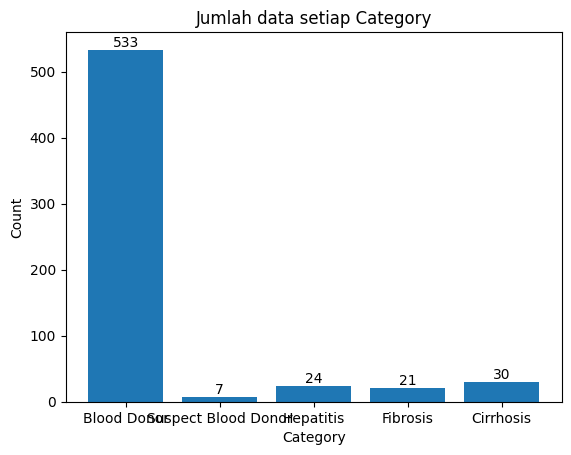

In [5]:
import matplotlib.pyplot as plt

# Menghitung Jumlah data setiap Category
counts = [
    data[data['Category'] == '0=Blood Donor']['Age'].count(),
    data[data['Category'] == '0s=suspect Blood Donor']['Age'].count(),
    data[data['Category'] == '1=Hepatitis']['Age'].count(),
    data[data['Category'] == '2=Fibrosis']['Age'].count(),
    data[data['Category'] == '3=Cirrhosis']['Age'].count()
]

# Define the categories
categories = ['Blood Donor', 'Suspect Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']

# Create a bar chart
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Jumlah data setiap Category')
for i, count in enumerate(counts):
    plt.text(categories[i], count, str(count), ha='center', va='bottom')
plt.show()


### **TYPE DATA**
Semua atribut bertype data numerik kecuali atribut pada kolom "Category" dan "Sex"

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


### **Mapping numeric values**
"Mapping numeric values" merujuk pada proses mengaitkan atau menghubungkan suatu nilai numerik dengan nilai lainnya. Hal ini dapat dilakukan untuk berbagai tujuan, seperti mengubah rentang nilai, mengkategorikan data, atau menciptakan representasi yang lebih mudah dimengerti.

Berikut adalah beberapa contoh penggunaan "mapping numeric values":

Normalisasi Data:
Dalam analisis data, seringkali penting untuk mengubah nilai-nilai numerik sehingga mereka berada dalam rentang tertentu. Misalnya, jika Anda memiliki data yang tersebar di antara 0 dan 100, Anda mungkin ingin mengubahnya menjadi rentang 0 hingga 1.

Kategorisasi:
Anda dapat menggolongkan nilai numerik ke dalam kategori tertentu. Misalnya, jika Anda memiliki data usia, Anda bisa membuat kategori seperti "anak-anak," "remaja," dan "dewasa" dengan mengaitkan rentang usia tertentu dengan setiap kategori.

Encoding:
Dalam machine learning, khususnya pada pembelajaran mesin terhadap kategori atau label, seringkali diperlukan untuk mengonversi label kategori menjadi representasi numerik. Ini bisa dilakukan dengan membuat peta antara setiap kategori dan nilai numerik tertentu.

Visualisasi Data:
Dalam visualisasi data, Anda mungkin ingin mengaitkan nilai-nilai numerik dengan warna atau ukuran untuk memperjelas pola atau perbedaan dalam data.

Transformasi Fungsi:
Pemetaan nilai numerik dapat dilakukan melalui fungsi matematis atau transformasi. Sebagai contoh, mengkuadratkan atau mengakarkan nilai-nilai numerik untuk mengubah distribusi data.

Pada proses ini ada 2 kolom yang akan di mapping diantaranya ada "Category" pada kolom ini adalah kolom target yang aakan di mapping yang dimana value sebelumnya ada beberapa kategeri tapi pada dasarnya ada dua kategori yaitu donor darah dan mereka yang menderita Hepatitis C atau tahap-tahap perkembangan Hepatitis C, seperti Fibrosis dan Sirosis, jadi disini mapping menjadi dua yang dimana yang donor darah = 0 dan hepatitis C dengan tahap perkembangannya = 1.
Kemudian kolom "Sex" pada kolom ini yang akan di mapping m/male = 1 dan f/famale = 2

In [7]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
data['Category'] = data['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

data['Sex'] = data['Sex'].map({'m': 1, 'f': 2})

In [9]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7



Memeriksa kembali tipe data setelah transformasi

In [10]:
data.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

## **EKSPLORASI DATA**
Eksplorasi Data (ED) adalah suatu proses analisis awal pada data untuk memahami dan meringkas karakteristik utama dari data tersebut. Tujuan dari eksplorasi data adalah mengidentifikasi pola, tren, anomali, dan informasi penting lainnya tanpa membuat asumsi sebelumnya. Eksplorasi data merupakan tahap kritis dalam analisis data dan dapat melibatkan berbagai metode, teknik, dan visualisasi data.

### **Describe data**
mengembalikan DataFrame baru yang berisi berbagai statistik untuk setiap kolom dalam DataFrame asli data. Statistik tersebut umumnya mencakup:

- Count: Jumlah nilai non-null.
- Mean: Nilai rata-rata atau rata-rata.
- Std: Deviasi standar, ukuran sebaran data.
- Min: Nilai minimum.
- 25%: Kuartil pertama atau persentil ke-25.
- 50%: Mediana atau persentil ke-50.
- 75%: Kuartil ketiga atau persentil ke-75.
- Max: Nilai maksimum.

Statistik ini memberikan ringkasan cepat tentang distribusi setiap kolom numerik dalam DataFrame, membantu analis dan ilmuwan data untuk mendapatkan gambaran tentang kecenderungan sentral data, sebaran, dan bentuk keseluruhan. Perlu diingat bahwa statistik yang tepat dapat bervariasi berdasarkan versi pandas atau konfigurasi tertentu yang digunakan.

In [11]:
data.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,0.121951,47.408130,1.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.327496,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,0.000000,19.000000,1.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,1.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,2.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,1.000000,77.000000,2.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### **Matrix correlation**
"Having a look at the correlation matrix" adalah istilah yang merujuk pada kegiatan memeriksa atau menganalisis matriks korelasi. Matriks korelasi adalah suatu tabel yang menunjukkan seberapa erat hubungan antara dua atau lebih variabel. Ini memberikan informasi tentang arah dan kekuatan hubungan antar variabel tersebut.

Matriks korelasi umumnya digunakan dalam statistika, analisis data, dan machine learning untuk memahami sejauh mana variabel-variabel saling terkait. Nilai korelasi berkisar antara -1 hingga 1, dengan interpretasi sebagai berikut:

- 1: Korelasi sempurna (positif)
- 0: Tidak ada korelasi
- -1: Korelasi sempurna (negatif)

<Axes: >

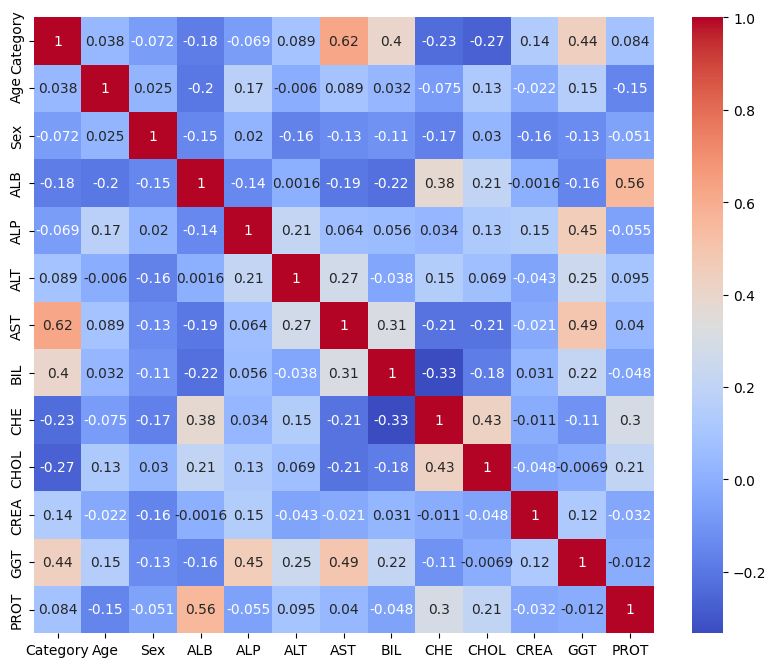

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='coolwarm')

### **Simple EDA**
Simple EDA (Exploratory Data Analysis) adalah pendekatan awal dalam menganalisis dataset untuk mendapatkan pemahaman awal tentang karakteristik data dan mengidentifikasi pola atau informasi yang menarik. EDA merupakan langkah kritis dalam tahap persiapan data sebelum melakukan analisis yang lebih lanjut. Tujuannya adalah untuk membantu peneliti atau analis data memahami struktur dataset, mengidentifikasi anomali, dan merumuskan pertanyaan atau hipotesis yang lebih mendalam.
melakukan Exploratory Data Analysis (EDA) dengan membuat histogram untuk masing-masing variabel numerik dalam dataset, memperhatikan distribusi data dan melihat perbedaan distribusi antar kategori ('Category').

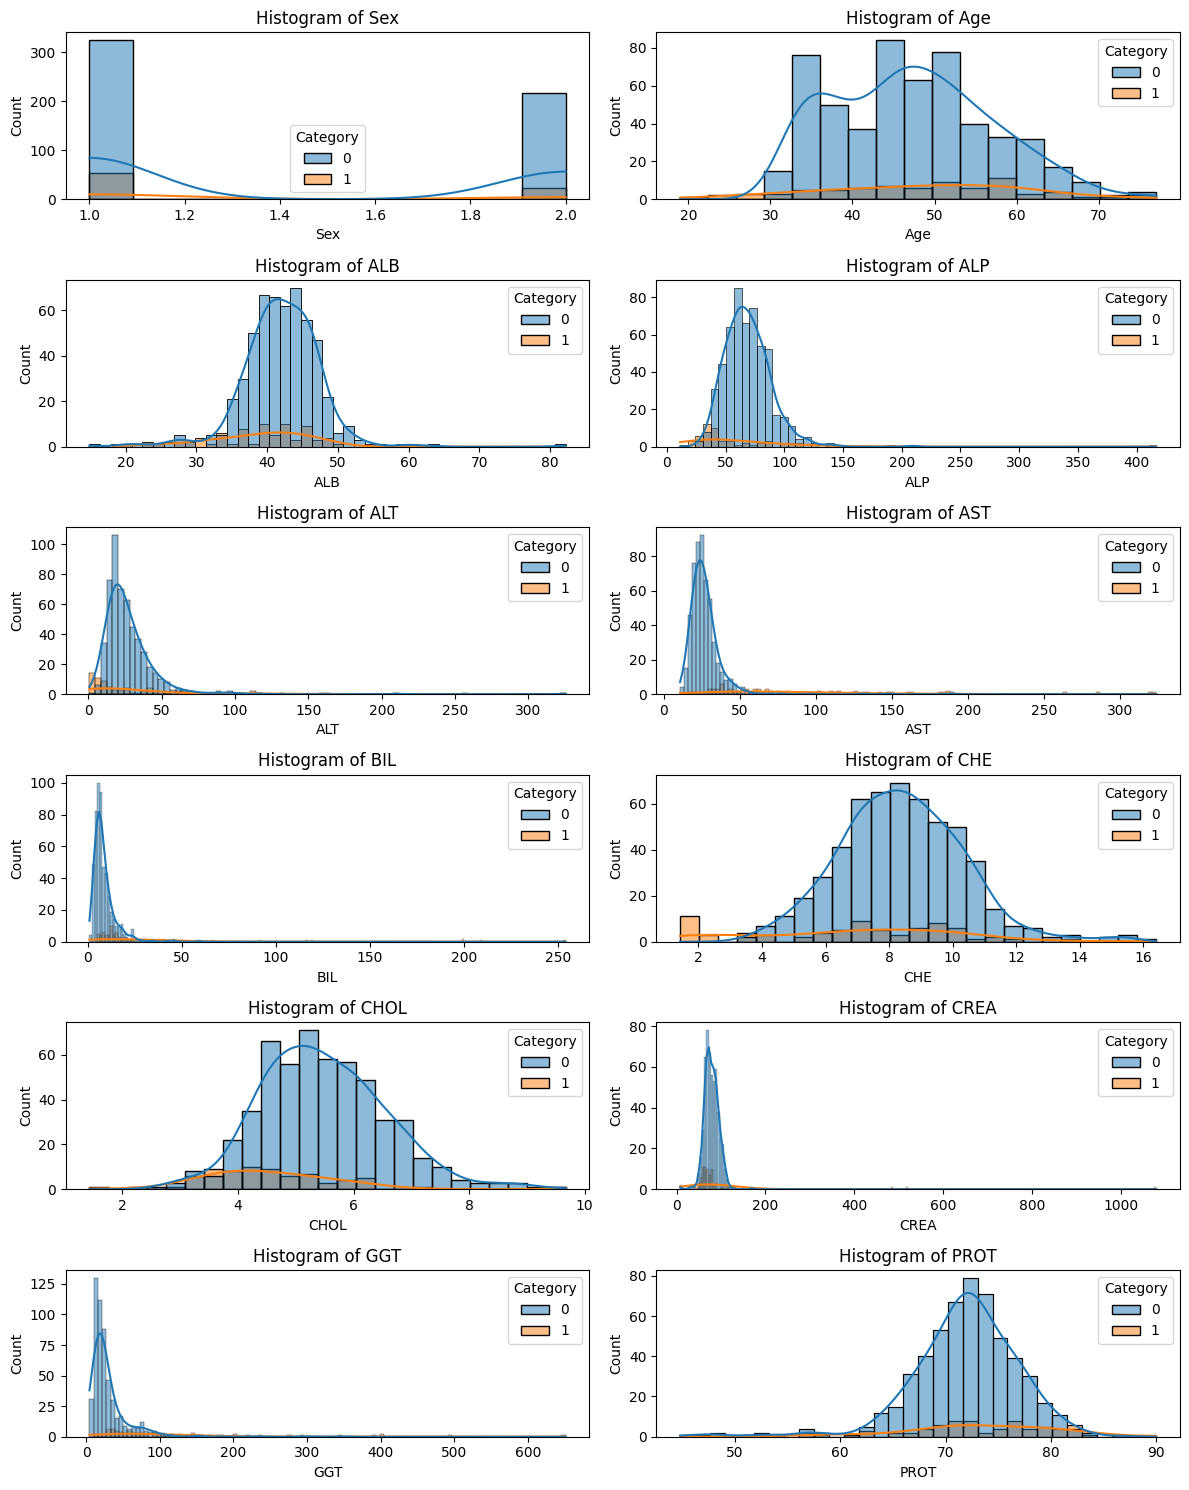

In [13]:
fig, axes = plt.subplots(6, 2, figsize=(12, 15))
axes = axes.flatten()

columns = ['Sex','Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, column in enumerate(columns):
    sns.histplot(x=data[column], hue=data['Category'], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


### **DESKRIPSI SETIAP FEATURE DAN CARA PENGAMBILAN**
Penjelasan dari setiap Featur data, Atribut 1 sampai dengan 4 mengacu pada data pasien:

1. Kategori (diagnosis): Merupakan variabel target atau output yang ingin diprediksi atau dianalisis. Mewakili diagnosis pasien dan memiliki kategori nilai seperti '0=Donor Darah', '0s=tersangka Donor Darah', '1=Hepatitis', '2=Fibrosis', '3=Sirosis'. Ini adalah variabel kategorikal.

2. Usia/Age (dalam tahun):
Merupakan fitur yang mencatat usia pasien dalam tahun. Ini adalah variabel numerik kontinu dan dapat memberikan informasi tentang distribusi usia pasien dalam dataset.
3. Jenis Kelamin (f,m):
Merupakan kategorisasi jenis kelamin pasien, dengan nilai 'f' untuk perempuan dan 'm' untuk laki-laki. Ini adalah variabel kategorikal biner.

4. ALB (Albumin): Albumin adalah protein yang diproduksi oleh hati dan merupakan salah satu komponen utama dalam serum darah. Pengukuran kadar albumin dapat memberikan informasi tentang fungsi hati.

5. ALP (Alkaline Phosphatase): Alkaline phosphatase adalah enzim yang ditemukan di hati dan tulang. Peningkatan ALP dalam darah dapat menunjukkan masalah hati atau gangguan tulang.

6. ALT (Alanine Aminotransferase): ALT adalah enzim hati yang terlibat dalam metabolisme asam amino. Peningkatan ALT dalam darah dapat menjadi tanda kerusakan hati, seperti pada hepatitis.

7. AST (Aspartate Aminotransferase): AST juga merupakan enzim hati yang terlibat dalam metabolisme asam amino. Kadar AST yang tinggi dalam darah dapat mengindikasikan kerusakan hati atau gangguan lainnya.

8. BIL (Bilirubin): Bilirubin adalah pigmen kuning yang dihasilkan ketika sel darah merah hancur. Kadar bilirubin yang tinggi dapat menjadi tanda masalah hati atau masalah dengan proses penguraian bilirubin dalam tubuh.

9. CHE (Cholinesterase): Cholinesterase adalah enzim yang dapat memberikan informasi tentang fungsi hati. Penurunan kadar cholinesterase dalam darah dapat mengindikasikan kerusakan hati.

10. CHOL (Cholesterol): Kolesterol adalah lemak yang penting untuk tubuh, tetapi kadar kolesterol yang tinggi dalam darah dapat meningkatkan risiko penyakit jantung.

11. CREA (Creatinine): Creatinine adalah produk sisa dari metabolisme otot. Kadar kreatinin dalam darah dapat memberikan informasi tentang fungsi ginjal.

12. GGT (Gamma-Glutamyl Transferase): GGT adalah enzim yang ditemukan di hati dan dapat meningkat pada berbagai gangguan hati, termasuk penyakit hati alkoholik.

13. PROT (Protein): Kadar total protein dalam darah dapat memberikan informasi tentang status gizi dan kesehatan umum. Kadar protein yang rendah dalam darah dapat menjadi tanda masalah gizi atau penyakit hati.

Teknik Pengambilan Sampel dengan menggunakan Darah (Serum atau Plasma):

- Alat Pengambilan Sampel: Jarum suntik atau sarung tangan pengambil darah (vacutainer).
- Teknik: Sampel darah biasanya diambil dari vena di lengan, seringkali dari vena di bagian dalam siku. Pada beberapa uji, dapat digunakan darah kapiler dari ujung jari.
- Persiapan: Pasien biasanya diminta untuk berpuasa sebelum pengambilan darah pada uji tertentu.


### **MISSING VALUE**
Missing value (nilai yang hilang) dalam konteks data merujuk pada keadaan di mana tidak ada nilai atau informasi yang tersedia untuk suatu variabel atau kolom pada suatu pengamatan atau baris data tertentu. Missing value dapat muncul karena beberapa alasan, termasuk kesalahan pengukuran, kegagalan perangkat, atau karena karakteristik alami dari data.

Dalam analisis data, penanganan missing value menjadi penting karena dapat memengaruhi hasil analisis dan model yang dibangun. Beberapa strategi umum untuk menangani missing value termasuk:

1. Menghapus Baris dengan Missing Value:
Metode ini melibatkan penghapusan seluruh baris data yang mengandung missing value. Namun, ini dapat menyebabkan kehilangan informasi yang berharga jika banyak data hilang.

2. Imputasi:
Imputasi melibatkan mengisi missing value dengan nilai yang diestimasi berdasarkan data yang ada. Ini bisa berupa mean, median, modus, atau nilai yang dihitung dari data lain.

3. Model Berbasis Imputasi:
Menggunakan model prediktif untuk memprediksi nilai yang hilang berdasarkan variabel lain. Contoh model berbasis imputasi termasuk regresi atau algoritma machine learning.

4. Peningkatan Pengumpulan Data:
Melibatkan upaya untuk meningkatkan pengumpulan data agar lebih lengkap dan mengurangi jumlah missing value di masa depan.

5. Menandai Missing Value:
Menggunakan penanda khusus (seperti NaN - Not a Number) untuk mengidentifikasi missing value dan mengizinkan model atau analisis data untuk mengatasi keberadaan nilai yang hilang secara eksplisit.

In [14]:
#Mencari data missing value
data.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Pada test diatas detemukan missing value pada table :
- ALB : 1
- ALP : 18
- ALT : 1
- CHOL : 10
- PROT : 1

Mengisi Missing value dengan Rata-Rata

In [15]:
#impute missing data

data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)

Pengecekan Kembali Missng value

In [16]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

Missing value sudah terisi

### **Balencing Data**
Kumpulan data yang tidak seimbang menimbulkan tantangan umum bagi praktisi pembelajaran mesin dalam masalah klasifikasi biner. Skenario ini sering muncul dalam aplikasi bisnis praktis seperti deteksi penipuan, pemfilteran spam , penemuan penyakit langka, dan deteksi kesalahan perangkat keras. Untuk mengatasi masalah ini, salah satu teknik yang populer adalah Synthetic Minority Oversampling Technique (SMOTE). SMOTE dirancang khusus untuk mengatasi kumpulan data yang tidak seimbang dengan menghasilkan sampel sintetis untuk kelas minoritas.

In [17]:
data['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

Dapat dilihat hasil dari percobaan diatas menghasilkan data yang sangat tidak seimbang 540 berbanding dengang 75, tentu hasil ini memiliki perbadaan yang sangat jauh, oleh karena itu perlu adanya balencing data.

### **Outliers**
Outliers, atau nilai-nilai ekstrem, adalah titik data yang signifikan atau ekstrim yang berbeda secara signifikan dari mayoritas data dalam sebuah kumpulan data. Outliers dapat muncul dalam berbagai bentuk dan dapat mempengaruhi analisis statistik karena mereka dapat menyebabkan kesalahan dalam estimasi parameter dan menarik hasil analisis ke arah yang tidak akurat.

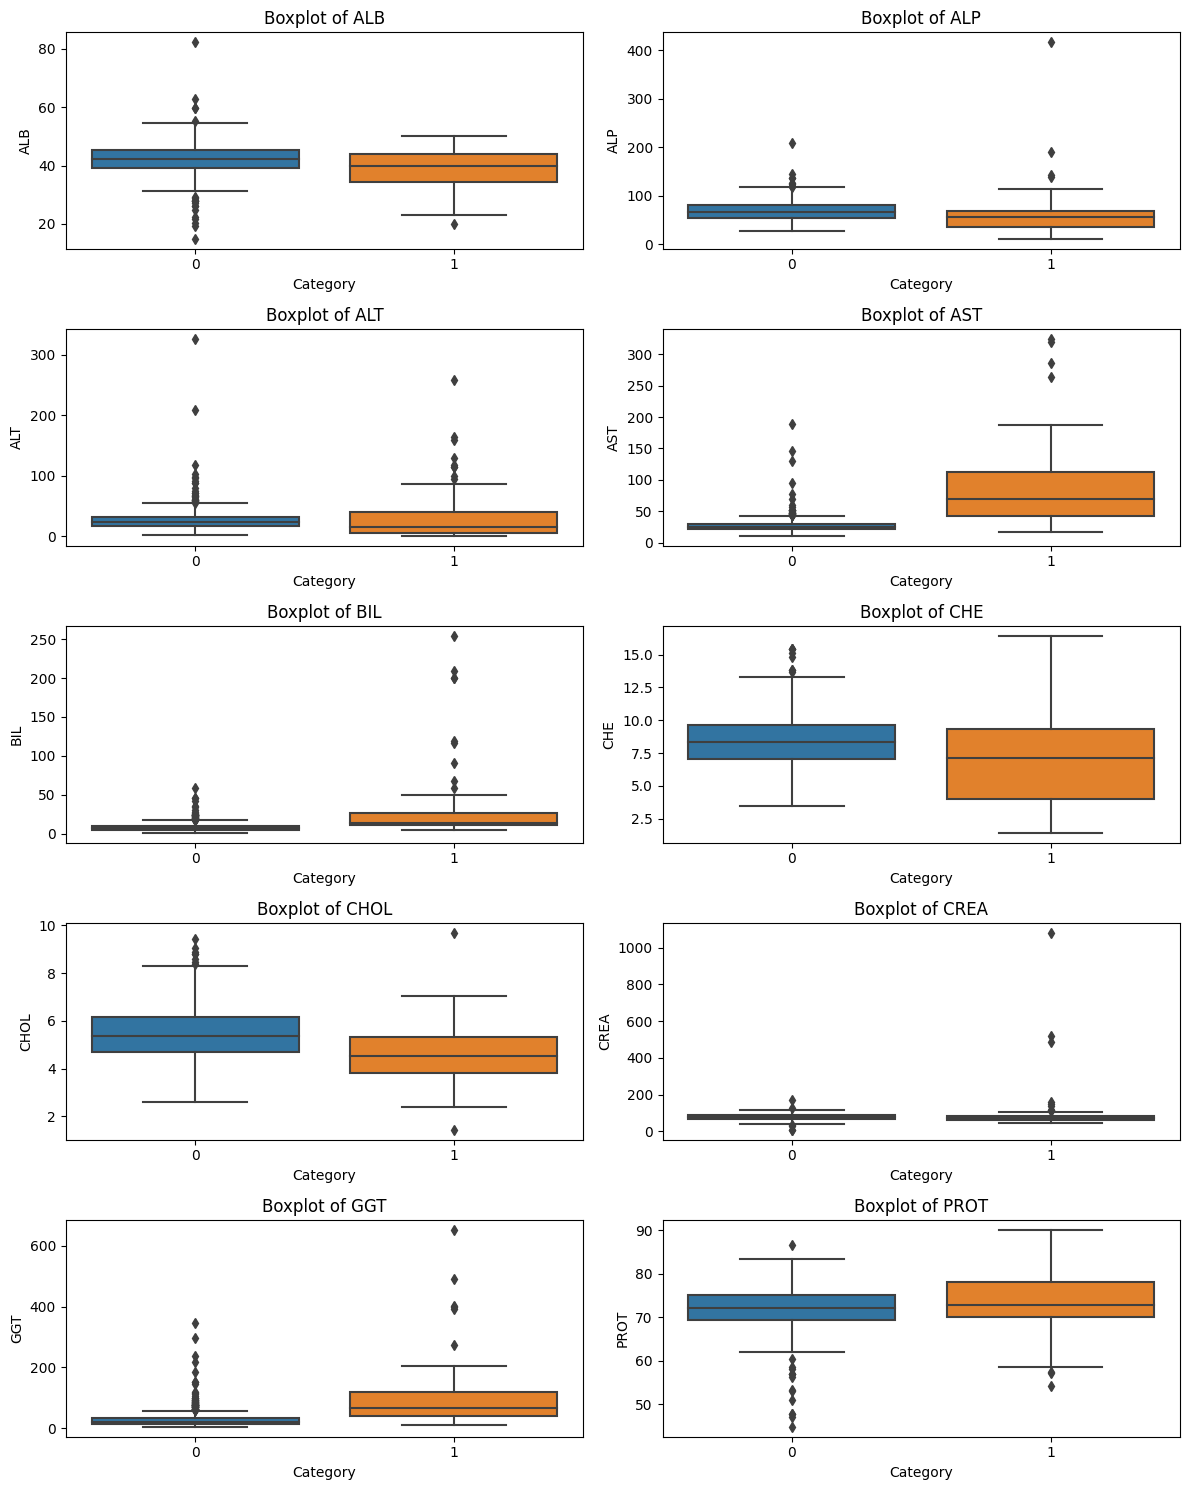

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.flatten()

columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, column in enumerate(columns):
    sns.boxplot(x=data['Category'], y=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# **PREPROCESSING DATA**
Hal-hal yang dilakukan pada preprosed
- Memisahkan feature dan target
- seleksi feature
- Mencari fitur data terbaik menggunakan information gain dan kbest
- Scaling, Balencing data dan Mensplit/memisahkan data train dan data test

## **Memisahkan Feature dan Target**
Pada tahap ini akan melakukan pemisahan terhadap sebuah colom, yang nantinya akan dipisah menjadi mana kolom sebagai feature dan mana kolom yang sebagai target, berikut table yang akan dipisah :
- Feature : Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT
- Targer  : Category

In [19]:
# Memisahkan data feature dan target
X = data.drop("Category", axis=1)
y = data['Category']

## **Seleksi Feature**
Information Gain adalah ukuran yang digunakan dalam konteks pohon keputusan (decision tree) untuk menilai seberapa baik suatu fitur dapat memisahkan data menjadi kelas yang berbeda. Information Gain dihitung dengan mengukur seberapa banyak informasi yang diberikan oleh suatu fitur terhadap pemisahan kelas dalam suatu dataset. Semakin tinggi Information Gain, semakin baik fitur tersebut dalam memprediksi kelas.

Information Gain biasanya digunakan dalam algoritma pembelajaran mesin yang berbasis pohon, seperti ID3 (Iterative Dichotomiser 3) atau C4.5. Pada setiap tahap pembangunan pohon keputusan, algoritma mencari fitur dengan Information Gain tertinggi untuk memilih sebagai node pemisah berikutnya.

k-Best:
k-Best merujuk pada teknik pemilihan fitur di mana kita memilih k fitur terbaik berdasarkan suatu metrik atau skor tertentu. Metode ini membantu untuk mengurangi dimensi dataset dengan memilih subset fitur yang paling informatif atau yang paling berkontribusi dalam memprediksi variabel target.

Teknik pemilihan fitur k-Best umumnya menggunakan skor atau metrik seperti chi-square, f-regression, mutual information, dll., untuk menilai pentingnya setiap fitur. Kemudian, k fitur terbaik dipilih berdasarkan skor tersebut.

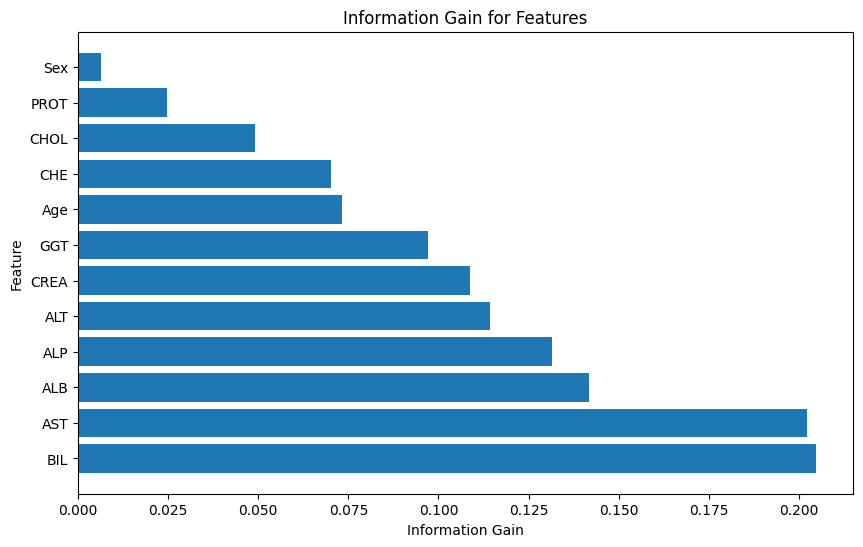

In [20]:
# Mencari fitur data terbaik menggunakan information gain
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Menghitung Information Gain untuk setiap fitur
information_gains = mutual_info_classif(X, y, discrete_features=[0])  # Indeks 0 mengacu pada kolom 'Sex' yang merupakan variabel kategorikal

# Membuat DataFrame dengan nama fitur dan nilai Information Gain
feature_importance = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gains})

# Mengurutkan DataFrame berdasarkan Information Gain
feature_importance = feature_importance.sort_values(by='Information Gain', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Information Gain'])
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain for Features')
plt.show()


In [21]:
# mengambil feature terbaik menggunakan kbest
k = 12
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print(f"Fitur terbaik yang dipilih: {selected_features}")
dump(X_new, open('x.pkl', 'wb'))
dump(y, open('y.pkl', 'wb'))

Fitur terbaik yang dipilih: Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')


## **Scaling dan Mensplit/memisahkan data train dan data test**






### **Mensplit/memisahkan data train dan data test**
Membagi dataset menjadi data pelatihan (train data) dan data pengujian (test data) adalah langkah penting dalam pengembangan model machine learning. Tujuan utamanya adalah untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, sehingga dapat memberikan perkiraan seberapa baik model tersebut dapat beradaptasi dengan data baru. Berikut adalah langkah-langkah umum untuk memisahkan data train dan test:

Setelah pemisahan, Anda akan memiliki empat variabel:

- X_train: Fitur dari data pelatihan.
- X_test: Fitur dari data pengujian.
- y_train: Target dari data pelatihan.
- y_test: Target dari data pengujian.

Data pelatihan digunakan untuk melatih model, sementara data pengujian digunakan untuk menguji kinerja model.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

### **Balencing data**
Pada tahap ini akan menyeimbangkan data dengan menggunakan SMOTE, Bisa dilihat dibawah ini yang sebelumnya perbedaan yang sangat jauh, setelah dilakukan penyeimbangan data, data berubah menjadi seimbang.

In [24]:
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
print(pd.Series(y_train_resampled).value_counts())

0    441
1    441
Name: Category, dtype: int64


### **Scaling Menggunakan minmaxscaler**

Min-Max Scaling, yang sering dikenal juga dengan normalisasi data atau normalization (karena z-score juga sering disebut normalization, maka sering terjadi ambiguitas atau tertukar-tukar :D).

Min-Max Scaling bekerja dengan scaling data/menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), dengan rentang yang biasa digunakan adalah 0 hingga 1. Berikut ini adalah uraian matematisnya:

$$ X_{\text{normalized}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}} $$

| X |
| --- |
| 4 |
| 7 |
| 10 |
| 5 |
| 8 |

\begin{align*}
\text{Min value:} & \quad X_{\text{min}} = 4 \\
\text{Max value:} & \quad X_{\text{max}} = 10 \\
\text{Original value / Data Yang ingin dinormalisasi:} & \quad X = 7 \\
\text{Normalization formula:} & \quad X_{\text{normalized}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}} \\
\text{Calculation:} & \quad X_{\text{normalized}} = \frac{{7 - 4}}{{10 - 4}} = \frac{3}{6} = 0.5 \\
\end{align*}

In [25]:
# Scaling dan Mensplit/memisahkan data train dan data test, kemudian Menskalakan data dengan minmaxscaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
dump(X_test_scaled, open('scaled.pkl', 'wb'))

# **IMPLEMENTASI**
Hal-hal yang dilakukan pada Implementasi

1.   Setelah data di split, data kemudian dilatih menggunakan model
2.   menghitung score akurasi setiap model(mencari model dengan akurasi terbaik)

## **MODEL NAIVE BAYES**
Algoritma Naïve Bayes adalah teknik klasifikasi berdasarkan penerapan teorema Bayes dengan asumsi kuat bahwa semua prediktor independen satu sama lain. Klasifikasi Bayesian menyediakan cara menghitung probabilitas posterior P (A | B) dari P ( A ), P (B) dan P (B | A). Lihatlah persamaan di bawah ini:
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$
Keterangan:
- P (A | B) adalah probabilitas posterior kelas (A, target) yang diberikan prediktor (B, atribut).
- P ( A ) adalah probabilitas kelas sebelumnya.
- P (B | A) adalah kemungkinan yang merupakan probabilitas kelas yang diberikan prediktor.
- P (B) adalah probabilitas prediktor sebelumnya.


Dalam contoh ini, kita akan membuat beberapa nilai imajiner:
$$ P(A) = 0.3 $$
$$ P(B|A) = 0.6 $$
$$ P(B) = 0.7 $$

Rumus:
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

Substitusi nilai:
$$ P(A|B) = \frac{(0.6)(0.3)}{0.7} $$

Hitung:
$$ P(A|B) = \frac{0.18}{0.7} $$

$$ P(A|B) \approx 0.257 $$



In [26]:
#gaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train_resampled)
dump(model, open('gnb.pkl', 'wb'))
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8861788617886179

In [27]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
248,0,0
365,0,0
432,0,0
610,1,1
132,0,0
...,...,...
281,0,0
291,0,0
250,0,0
11,0,0


## **MODEL RANDOM FOREST**
Random Forest adalah salah satu algoritma machine learning yang digunakan untuk melakukan klasifikasi dan regresi pada data. Algoritma ini bekerja dengan cara menggabungkan beberapa pohon keputusan (decision tree) yang dibuat secara acak. Setiap pohon keputusan dalam Random Forest akan memilih fitur secara acak dan hanya menggunakan sebagian data untuk membuat keputusan. Kemudian, hasil dari setiap pohon keputusan akan digabungkan untuk menghasilkan prediksi akhir.

Fungsi utama dari Random Forest adalah untuk meningkatkan akurasi prediksi pada data yang kompleks dan besar. Algoritma ini juga dapat digunakan untuk mengatasi masalah overfitting pada model machine learning.
Rumus atau formula yang digunakan dalam Random Forest adalah sebagai berikut:

1. Pembentukan pohon keputusan
Untuk setiap pohon keputusan dalam Random Forest, rumus yang digunakan adalah:
$$ f(x) = sum_{i=1}^{m} w_i h_i(x) $$
Dimana:
f(x) adalah output dari pohon keputusan, m adalah jumlah node dalam pohon keputusan, Wi adalah bobot dari setiap node dalam pohon keputusan, hi(x) adalah fungsi yang menghasilkan nilai 0 atau 1, tergantung pada apakah x memenuhi kondisi yang diberikan oleh node tersebut
2. Pembentukan Random Forest
Untuk membentuk Random Forest, rumus yang digunakan adalah:
$$ F(x) = \frac{1}{M} sum_{i=1}^{M} f_i(x) $$
Dimana:
F(x) adalah output dari Random Forest, M adalah jumlah pohon keputusan dalam Random Forest, fi(x) adalah output dari pohon keputusan ke-i, Dengan menggunakan rumus di atas, Random Forest dapat menghasilkan prediksi yang akurat dan dapat digunakan untuk berbagai macam masalah dalam machine learning.

pada model ini akan menggunakan GridSearch untuk mencari best parameter dan score akurasi tertinggi.

In [28]:
#GridsearchRandomForest

rfc_model = RandomForestClassifier()
rfc_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None]
}

grid_search_rfc = GridSearchCV(rfc_model, rfc_params, scoring='accuracy', cv=5)
grid_search_rfc.fit(X_train_scaled, y_train_resampled)

best_rfc_model = grid_search_rfc.best_estimator_
y_pred_rfc = best_rfc_model.predict(X_test_scaled)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best parameters: {grid_search_rfc.best_params_}")
print(f"Accuracy: {accuracy_rfc}")

Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.975609756097561


In [30]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=10)
model2.fit(X_train_scaled, y_train_resampled)
y_pred3 = model2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.975609756097561

In [31]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred3})
df

,Real Values,Predicted Values
248,0,0
365,0,0
432,0,0
610,1,1
132,0,0
...,...,...
281,0,0
291,0,0
250,0,0
11,0,0


# **EVALUASI**
## Evaluasi Hasil (Evaluate result)
Berdasarkan hasil evaluasi diperoleh bahwa permodelan proyek ini sudah memenuhi tujuan penelitian seperti yang telah deijelaskan pada tahap pemahaman bisnis (Bussiness Understanding), yang dimana tujuan awalnya yaitu analisis dan klasifikasi pasien berdasarkan atribut yang diberikan, terutama untuk mengidentifikasi pasien yang adalah donor darah dan mereka yang menderita Hepatitis C atau tahap-tahap perkembangan Hepatitis C, seperti Fibrosis dan Sirosis.


## Evaluasi Kinerja Model
Evaluasi kinerja model Random Forest pada dataset tersebut memberikan informasi yang signifikan tentang seberapa baik model dapat memprediksi dan mengklasifikasikan data. Di bawah ini adalah penjelasan untuk beberapa komponen kunci dari evaluasi kinerja model:

1. Akurasi (Accuracy):
  - Deskripsi: Akurasi mengukur sejauh mana model dapat memprediksi dengan benar pada seluruh data pengujian.
  - Hasil: Akurasi model adalah 95.9%, yang mengindikasikan bahwa sekitar 95.9% dari seluruh pengujian diklasifikasikan dengan benar oleh model.

2. Matriks Kebingungan (Confusion Matrix):
  - Deskripsi: Matriks kebingungan memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan kelas negatif.
  - Hasil: Matriks kebingungan menunjukkan bahwa model membuat 98 prediksi benar untuk kelas 0 (negatif) dan 20 prediksi benar untuk kelas 1 (positif), dengan 1 kesalahan prediksi untuk kelas 0 dan 4 kesalahan prediksi untuk kelas 1.

3. Laporan Klasifikasi (Classification Report):
  - Deskripsi: Laporan klasifikasi memberikan informasi rinci tentang kinerja model untuk setiap kelas, termasuk presisi, recall, dan F1-score.
  - Hasil: Untuk kelas 0 (negatif), model memiliki presisi sebesar 96%, recall sebesar 99%, dan F1-score sebesar 98%. Untuk kelas 1 (positif), presisi sebesar 95%, recall sebesar 83%, dan F1-score sebesar 89%.

4. Precision, Recall, dan F1-Score:
  - Precision: Menunjukkan sejauh mana prediksi positif yang dibuat oleh model adalah benar. Dalam konteks ini, presisi untuk kelas 0 adalah 96%, dan untuk kelas 1 adalah 95%.
  - Recall (Sensitivitas): Menunjukkan sejauh mana model dapat menangkap atau mengidentifikasi semua instansi positif. Dalam konteks ini, recall untuk kelas 0 adalah 99%, dan untuk kelas 1 adalah 83%.
  - F1-Score: Menggabungkan precision dan recall menjadi satu metrik yang menunjukkan seimbang antara keduanya. Dalam konteks ini, F1-score untuk kelas 0 adalah 98%, dan untuk kelas 1 adalah 89%.

In [32]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best Model Accuracy: {accuracy_rfc:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_rfc)
print("Best Model Classification Report:")
print(classification_rep_rfc)

Random Forest
Best Model Accuracy: 0.976
Best Model Confusion Matrix:
[[99  0]
 [ 3 21]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.88      0.93        24

    accuracy                           0.98       123
   macro avg       0.99      0.94      0.96       123
weighted avg       0.98      0.98      0.97       123

